# Script examples for drag data analysis

In [ ]:
import numpy as np
import drag_analysis
import importlib
import time
from matplotlib import pyplot as plt

In [24]:
# Set folder names
drag_data_folder_path = 'D:/Rowland/data/drag-data' # replace with your drag data folder path
date_folder_path = '2021-01-14'
entire_folder_path = os.path.join(drag_data_folder_path,date_folder_path)

## Analyze drag data in the folder

- `analyze_experiment_set ` analyzes all the drag data in the `entire_folder_path`.
- The output dictionary (here designated by `data_all`) contains experiment condition string as a key, and numpy array (U, drag, standard error, standard deviation, nu(kinematic viscosity)) as a value.
- Result files are generated in each drag data directory, which are subdirectories in the `entire_folder_path`.
- When `update` flag is `True`, it re-analyze the data and re-generate the result files.
- When `load_temperature` flag is `True`, it loads temperature information from "temprature/latest.csv" file and compute kinematic visocisties. When it is `False`, kinematic viscosities are set to $10^{-6}$ 

In [38]:
data_all = drag_analysis.analyze_experiment_set(entire_folder_path,update=True,load_temperature=True)

## Plotting drag data

- `plot_data` plots Drag (gf) vs U (m/s) in input data dictionary.

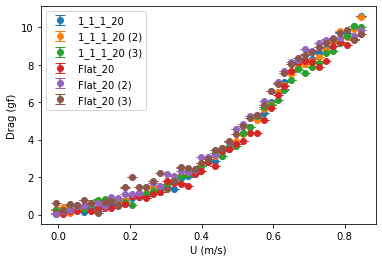

In [25]:
drag_analysis.plot_data(data_all)

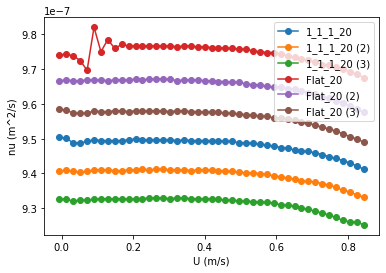

In [9]:
# plot kinematic viscosity in 'data_all'
drag_analysis.plot_nu(data_all)

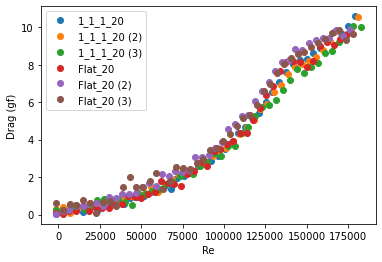

In [10]:
# plot Drag vs Re plot in 'data_all'
drag_analysis.plot_Re_Drag(data_all)

In [28]:
# select part of data using list comprehension
keys_1_1_1_20 = [x for x in data_all.keys() if x.startswith('1_1_1_20')]
keys_flat_20 = [x for x in data_all.keys() if x.startswith('Flat_20')]

data_1_1_1_20 = {k:data_all[k] for k in keys_1_1_1_20}
data_flat_20 = {k:data_all[k] for k in keys_flat_20}

(None, None)

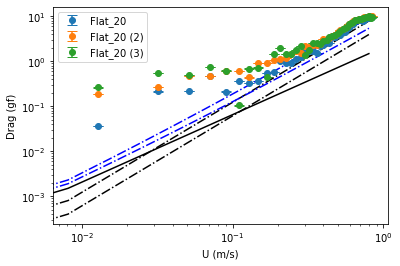

In [29]:
# plot selected data and compare with some power laws

drag_analysis.plot_data(data_flat_20)

xx = np.linspace(0,0.8,100)
yy_0 = 1.328*np.sqrt(0.1*0.048**2*xx**3)/9.8*1000
yy_1 = 0.5*999*xx**2*0.048*0.005/9.8*1000
yy_2 = 0.5*999*xx**2*0.048*0.005/9.8*1000*0.5

plt.plot(xx,yy_0,'k-',label='D_f')
plt.plot(xx,yy_1,'k-.',label='D_p with C_p = 1')
plt.plot(xx,yy_2,'k-.',label='D_p with C_p = 0.5')

plt.plot(xx,yy_0 + yy_1,'b-.',label='D_f + D_p with C_p = 1')
plt.plot(xx,yy_0 + yy_2,'b-.',label='D_f + D_p with C_p = 0.5')

# plt.legend()
plt.xscale('log'), plt.yscale('log')

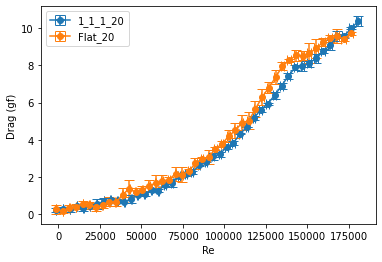

In [31]:
# binding data for repeated conditions (under development)

t = drag_analysis.data_binning(data_1_1_1_20,overlap=False)
t = drag_analysis.data_binning(data_flat_20,overlap=False)

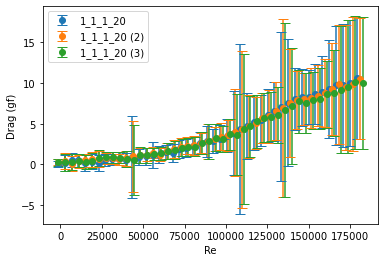

In [33]:
# plot with standard deviation, not with standard error of means
drag_analysis.plot_with_std(data_1_1_1_20)

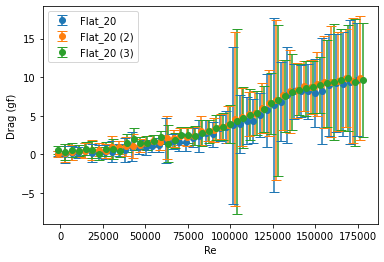

In [34]:
drag_analysis.plot_with_std(data_flat_20)